In [ ]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import os
import shutil

# Define the transform to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create the directory structure if it doesn't exist
os.makedirs('./data/cifar10/train', exist_ok=True)
os.makedirs('./data/cifar10/test', exist_ok=True)

# Download the training dataset
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
# Download the testing dataset
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)


# Function to save images to folders
def save_images_to_folder(dataset, folder_path):
    for i, (image, label) in enumerate(dataset):
        class_folder = os.path.join(folder_path, str(label))
        os.makedirs(class_folder, exist_ok=True)
        image_path = os.path.join(class_folder, f"{i}.png")
        torchvision.utils.save_image(image, image_path)

# Save training images
save_images_to_folder(trainset, './data/cifar10/train')
# Save testing images
save_images_to_folder(testset, './data/cifar10/test')

print("CIFAR-10 images saved to train and test folders.")

CIFAR-10 images saved to train and test folders.


👆 Above code is to download the dataset. Ignore.

In [ ]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from captum.attr import LRP, visualization as viz
import torch.nn as nn

In [ ]:
# 1. Define transforms
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
# 2. Load dataset using ImageFolder
# CIFAR-10 images are in ./data/cifar10/train and ./data/cifar10/test
dataset = ImageFolder('./data/cifar10/train', transform=transform)

In [ ]:
# 3. Load a pretrained model
model = torchvision.models.resnet18(pretrained=True)

# Modify the output layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes for CIFAR-10

model.eval()
print("modified")

modified


In [ ]:
# 4. Get a single image and its label
img, label = dataset[0]
img = img.unsqueeze(0)
img.requires_grad = True
label

0

In [ ]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 5. Make prediction
pred = model(img).argmax().item()
print(pred, label)
print(f"Predicted: {class_names[pred]}, True: {class_names[label]}")

9 0
Predicted: truck, True: airplane


In [ ]:
# 6. Generate LRP explanation
lrp = LRP(model)
# Ensure input shape is (1, 3, 32, 32)
img = img.reshape(1, 3, 32, 32)
attr = lrp.attribute(img, target=pred)

In [ ]:

# 7. Visualize
img_np = img.squeeze(0).permute(1, 2, 0).detach().numpy() * 0.5 + 0.5
attr_np = attr.squeeze(0).permute(1, 2, 0).detach().numpy()

# Check shape of attr_np
print(attr_np.shape)  # dimensions

(32, 32, 3)


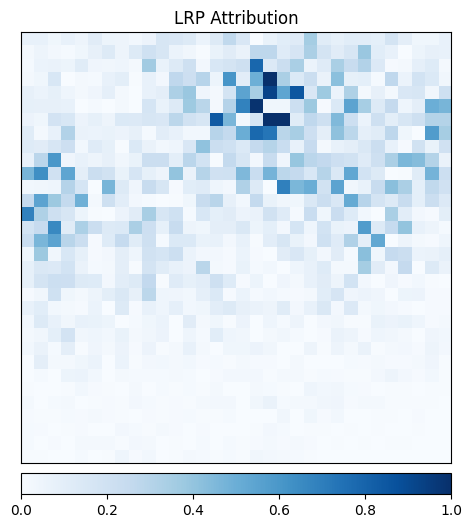

(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'LRP Attribution'}>)

In [ ]:
viz.visualize_image_attr(
    attr_np,  # Use attr_np directly without summation
    img_np,
    method="heat_map",
    sign="absolute_value",
    show_colorbar=True,
    title="LRP Attribution"
)

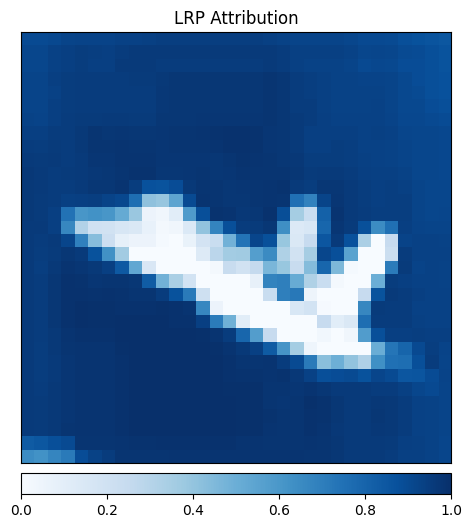

In [ ]:
import matplotlib.pyplot as plt

viz.visualize_image_attr(
    img_np,
    method="heat_map",
    sign="absolute_value",
    show_colorbar=True,
    title="LRP Attribution"
)
plt.show()
# Actual image